In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt 

In [2]:
d = pd.read_csv('Churn_Modelling.csv')
d.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.0,1,1,1,101348.9,1
1,608,Female,41,1,83807.9,1,0,1,112542.6,0
2,502,Female,42,8,159660.8,3,1,0,113931.6,1
3,699,Female,39,1,0.0,2,0,0,93826.6,0
4,850,Female,43,2,125510.8,1,1,1,79084.1,0


In [3]:
d.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

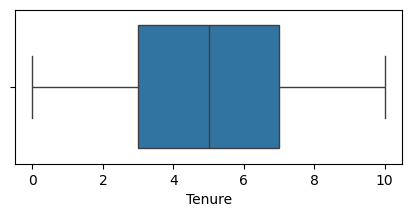

In [4]:
plt.figure(figsize=(5,2))
sns.boxplot(x=d['Tenure'])
plt.show()

In [5]:
Gender = {"Male":1, "Female":0}
d['Gender'] = d['Gender'].map(Gender)

In [6]:
d.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.0,1,1,1,101348.9,1
1,608,0,41,1,83807.9,1,0,1,112542.6,0
2,502,0,42,8,159660.8,3,1,0,113931.6,1
3,699,0,39,1,0.0,2,0,0,93826.6,0
4,850,0,43,2,125510.8,1,1,1,79084.1,0
5,645,1,44,8,113755.8,2,1,0,149756.7,1
6,822,1,50,7,0.0,2,1,1,10062.8,0
7,376,0,29,4,115046.7,4,1,0,119346.9,1
8,501,1,44,4,142051.1,2,0,1,74940.5,0
9,684,1,27,2,134603.9,1,1,1,71725.7,0


In [7]:
x = d.drop('Exited', axis=1)
y = d['Exited']

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()

In [10]:
sc.fit_transform(x)

array([[-0.32622142, -1.09598752,  0.29351742, ...,  0.64609167,
         0.97024255,  0.02188676],
       [-0.44003595, -1.09598752,  0.19816383, ..., -1.54776799,
         0.97024255,  0.21653401],
       [-1.53679418, -1.09598752,  0.29351742, ...,  0.64609167,
        -1.03067011,  0.24068733],
       ...,
       [ 0.60498839, -1.09598752, -0.27860412, ..., -1.54776799,
         0.97024255, -1.0086428 ],
       [ 1.25683526,  0.91241915,  0.29351742, ...,  0.64609167,
        -1.03067011, -0.12523115],
       [ 1.46377078, -1.09598752, -1.04143285, ...,  0.64609167,
        -1.03067011, -1.07636948]])

In [11]:
x = pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021887
1,-0.440036,-1.095988,0.198164,-1.387538,0.117351,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108919
4,2.063884,-1.095988,0.388871,-1.041760,0.785727,-0.911583,0.646092,0.970243,-0.365276
5,-0.057205,0.912419,0.484225,1.032908,0.597329,0.807737,0.646092,-1.030670,0.863650
6,1.774174,0.912419,1.056346,0.687130,-1.225848,0.807737,0.646092,0.970243,-1.565487
7,-2.840488,-1.095988,-0.946079,-0.350204,0.618018,4.246377,0.646092,-1.030670,0.334854
8,-1.547141,0.912419,0.484225,-0.350204,1.050821,0.807737,-1.547768,0.970243,-0.437329
9,0.346319,0.912419,-1.136786,-1.041760,0.931464,-0.911583,0.646092,0.970243,-0.493231


In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=10)

In [13]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((8000, 9), (2000, 9), (8000,), (2000,))

In [14]:
xtrain.shape

(8000, 9)

In [15]:
import tensorflow

In [16]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.callbacks import  EarlyStopping
from keras.regularizers import l2

In [17]:
ann = Sequential()

In [18]:
ann.add(Dense(6,input_dim = 9, activation='relu', kernel_regularizer=l2(0.01)))
ann.add(BatchNormalization())
ann.add(Dense(4, activation='relu',kernel_regularizer=l2(0.01)))
ann.add(BatchNormalization())
ann.add(Dense(2, activation='relu', kernel_regularizer=l2(0.01)))
ann.add(BatchNormalization())
ann.add(Dense(1, activation='sigmoid'))

c:\Users\AZAM KHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
ann.fit(xtrain,ytrain,batch_size=50 ,epochs=25, validation_data=(xtest,ytest),callbacks=EarlyStopping())

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5322 - loss: 0.8479 - val_accuracy: 0.7720 - val_loss: 0.7337
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7892 - loss: 0.7098 - val_accuracy: 0.8030 - val_loss: 0.6368
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8035 - loss: 0.6139 - val_accuracy: 0.8145 - val_loss: 0.5570
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8178 - loss: 0.5425 - val_accuracy: 0.8260 - val_loss: 0.4943
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8388 - loss: 0.4757 - val_accuracy: 0.8345 - val_loss: 0.4640
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8511 - loss: 0.4455 - val_accuracy: 0.8390 - val_loss: 0.4426
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8485 - loss: 0.4292 - val_accuracy: 0.8455 - val_loss: 0.4308
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8495 - loss: 0.4243 - val_accuracy: 0.

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix
pred = ann.predict(xtest)
pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.2829777 ],
       [0.5814326 ],
       [0.60735554],
       ...,
       [0.16943723],
       [0.2829777 ],
       [0.9846814 ]], dtype=float32)

In [22]:
for i in pred:
    print(i[0])

0.2829777
0.5814326
0.60735554
0.034226343
0.6438359
0.23392569
0.1603803
0.23855938
0.044966273
0.40450546
0.10843172
0.0360941
0.057372354
0.11292371
0.3967794
0.49731407
0.2829777
0.9606578
0.080643415
0.033131633
0.037258834
0.4664985
0.5251093
0.033315632
0.2711357
0.028019518
0.2829777
0.034411903
0.2829777
0.05207887
0.067665204
0.56429464
0.04411492
0.034411903
0.034411903
0.16777825
0.22633806
0.05363345
0.2829777
0.18292262
0.0532083
0.09009111
0.134559
0.19628899
0.022283867
0.19496061
0.08044881
0.065406516
0.034411903
0.034411903
0.041418664
0.2829777
0.01918635
0.5861851
0.07680085
0.09438423
0.12993948
0.4408573
0.11115282
0.08972183
0.04926657
0.057614315
0.20168027
0.916811
0.9874488
0.03576604
0.13200785
0.16853489
0.1175495
0.2384517
0.15603843
0.03325022
0.07469473
0.034411903
0.09457048
0.13204782
0.035439573
0.2829777
0.16693193
0.08528687
0.053959683
0.026911361
0.38941732
0.8825476
0.067160726
0.2829777
0.77146006
0.038664963
0.6316315
0.24928471
0.04091384
0.04

In [23]:
pred_data = []
for i in pred:
    if i[0]>0.5:
        pred_data.append(1)
    else:
        pred_data.append(0)
    

In [24]:
pred_data

[0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


In [25]:
accuracy_score(ytest,pred_data)*100

84.35000000000001

In [26]:
pred1 = ann.predict(xtrain)
pred_data1 = []
for i in pred1:
    if i[0]>0.5:
        pred_data1.append(1)
    else:
        pred_data1.append(0)
    

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step


In [27]:
accuracy_score(ytrain,pred_data1)*100

85.6375

In [28]:
pred = ann.predict(sc.transform([[619	,0,	42,	2,	0.0,	1	,1	,1,101348.9	]]))
for i in range(len(pred)):
    if pred[i]>0.5:
        pred[i]=1
        print("Customer will leave the bank")
    else:
        pred[i]=0
        print("Customer will not leave the bank")
        
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Customer will not leave the bank


c:\Users\AZAM KHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.]], dtype=float32)

In [29]:
d

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.0,1,1,1,101348.9,1
1,608,0,41,1,83807.9,1,0,1,112542.6,0
2,502,0,42,8,159660.8,3,1,0,113931.6,1
3,699,0,39,1,0.0,2,0,0,93826.6,0
4,850,0,43,2,125510.8,1,1,1,79084.1,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.0,2,1,0,96270.6,0
9996,516,1,35,10,57369.6,1,1,1,101699.8,0
9997,709,0,36,7,0.0,1,0,1,42085.6,1
9998,772,1,42,3,75075.3,2,1,0,92888.5,1
